# Data Analysis on Coursera courses dataset.

The dataset was obtained from Kaggle.The dataset is about different types of courses available on coursera along with the organization which offers the course,the course certificate type,course rating,course difficulty and number of students enrolled.Through our data analysis we will try to answer following questions:
1.Which course difficulty do students prefer the most?
2.Which university course has more students enrolled?
3.What kind of courses are more popular?
4.Do people tend to apply for specialization or regular courses?
5.Which university has most number of courses on Coursera?

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading the data
course=pd.read_csv('Coursera data.csv')
course
course=course.drop(['Unnamed: 0'],axis=1)#dropping unnecessary columns
course

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


# Data Pre-processing

We can see from the students enrolled column that it is of type object.We need to convert it to int or float for further analysis and for that we need to clean the 'k' and 'm' after the number.

In [4]:
course1=course['course_students_enrolled'].str[1]
for i,j in enumerate(course1):
    if j=='.':
        if course['course_students_enrolled'][i][3]=='m':
            course['course_students_enrolled'][i]=course['course_students_enrolled'][i].replace('.','').replace('m','00000')
        if course['course_students_enrolled'][i][3]=='k':
            course['course_students_enrolled'][i]=course['course_students_enrolled'][i].replace('.','').replace('k','00')
    else:
        course['course_students_enrolled'][i]=course['course_students_enrolled'][i].replace('k','000')
course['course_students_enrolled']=course['course_students_enrolled'].astype(int)
#course['course_students_enrolled']
            

 

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now,lets see the top 5 courses who have most number of students enrolled.

In [6]:
sorted_course=course.nlargest(5,['course_students_enrolled'])
sorted_course

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000


From the result above, we can see that the highest number of students enrolled in a course is 3.2 million.Also,out of the top 5 courses who have most number of students enrolled we can see that 4 courses are related to python,data science and machine learning(Technical Courses)

Now,lets look at the organizations with multiple courses on coursera.

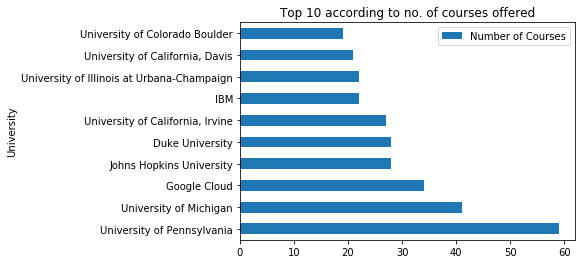

In [7]:
#Getting the top 10 universities with most number of courses offered
from operator import itemgetter
d={}
for i in course['course_organization']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
university=[]
num_courses=[]
sorted_d = dict(sorted(d.items(),key=itemgetter(1),reverse=True)[:10])
for k,v in sorted_d.items():
    university.append(k)
    num_courses.append(int(v))
top_10=pd.DataFrame({'University':university,'Number of Courses':num_courses})
top_10.plot.barh(x='University',y='Number of Courses',title='Top 10 according to no. of courses offered')



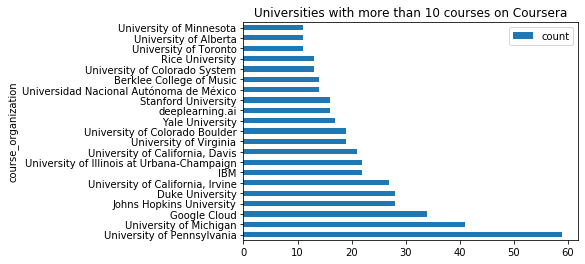

In [8]:
#Now,lets see the universities with more than 10 courses on coursera.
orgs = []
counts = []
for key, value in d.items():
    if value > 10:
        orgs.append(key)
        counts.append(value)
    else:
        continue
course_org_greater_than_1 = pd.DataFrame({'course_organization':orgs, 'count':counts})
course_org_greater_than_1.sort_values(by='count', ascending=False, inplace=True)
course_org_greater_than_1.plot.barh(x='course_organization',y='count',title='Universities with more than 10 courses on Coursera')



From the results above, we can see that University of Pennsylvania is the organization with highest number of courses on coursera.But what is their average course rating?We need to find out whether the top organizations with more number of courses on coursera produce quality courses or is it just quantity over quality?

In [9]:
import numpy as np
table=pd.pivot_table(course,index='course_organization',values='course_rating',aggfunc=np.mean).to_dict()
orgs = course_org_greater_than_1['course_organization'].to_list()
avg_rating = []
for org in orgs:
    for key,value in table['course_rating'].items():
        if key==org:
            avg_rating.append(value)
        else:
            continue
course_org_greater_than_1['average_rating'] = avg_rating
print(course_org_greater_than_1)


                           course_organization  count  average_rating
0                   University of Pennsylvania     59        4.696610
8                       University of Michigan     41        4.729268
11                                Google Cloud     34        4.582353
1                     Johns Hopkins University     28        4.660714
12                             Duke University     28        4.664286
6             University of California, Irvine     27        4.596296
4                                          IBM     22        4.613636
7   University of Illinois at Urbana-Champaign     22        4.654545
16             University of California, Davis     21        4.619048
13                      University of Virginia     19        4.715789
10              University of Colorado Boulder     19        4.668421
2                              Yale University     17        4.817647
3                              deeplearning.ai     16        4.743750
14                  

Prima Facie,we cant see much difference between the average ratings of the courses offered by these organizations.Lets plot this data to clarify things.

Average of all courses is 4.68781912548109


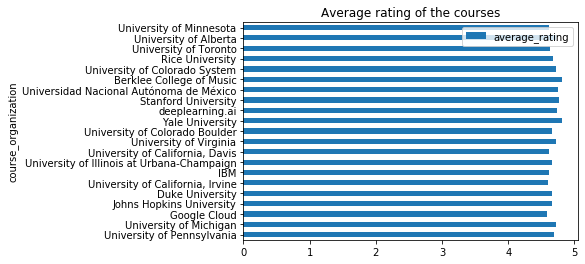

In [10]:
course_org_greater_than_1.plot.barh(x='course_organization',y='average_rating',title='Average rating of the courses')
average=course_org_greater_than_1['average_rating'].mean()
print('Average of all courses is {}'.format(average))


The average rating of all the courses is 4.68/5 which is good.So,we can conclude that these organizations not only produce courses high in quantity but also in quality.Lets move on to answer few more questions

# Which courses have the highest rating on Coursera?

In [11]:
table=pd.pivot_table(course,index='course_organization',values='course_rating',aggfunc=np.mean).to_dict()
top_ratings_dict = dict(sorted(table['course_rating'].items(),key=itemgetter(1),reverse=True)[:10])
keys=[]
vals=[]
for key,val in top_ratings_dict.items():
    keys.append(key)
    vals.append(val)
ratings_df=pd.DataFrame({'Organization':keys,'Rating':vals})
print(ratings_df)


                                  Organization    Rating
0                             Crece con Google  4.900000
1                    Google - Spectrum Sharing  4.900000
2               Hebrew University of Jerusalem  4.900000
3                       London Business School  4.900000
4  Nanyang Technological University, Singapore  4.900000
5                                    ScrumTrek  4.900000
6            Universidade Estadual de Campinas  4.900000
7                    Universidade de São Paulo  4.866667
8                    The University of Chicago  4.850000
9                     Universidad de los Andes  4.820000


In [23]:
#Lets check what kind of courses these organizations with high ratings offer.
list_of_org=ratings_df['Organization'].to_list()
title=course[course['course_organization'].isin(list_of_org)]        

                                          course_title  \
36   Agile и Scrum в работе над проектами и продуктами   
82   Become a CBRS Certified Professional Installer...   
99   Brand Management: Aligning Business, Brand and...   
103  Build a Modern Computer from First Principles:...   
325    Formulación y evaluación de proyectos complejos   
358              Fundamentos de Finanzas Empresariales   
463  Internet Giants: The Law and Economics of Medi...   
495                   Introduction to Forensic Science   
529  Introdução aos Princípios e Práticas da Gestão...   
530  Introdução à Ciência da Computação com Python ...   
560               Liderazgo efectivo para el siglo XXI   
582                                  Marketing Digital   
587                                    Marketing Verde   
703                 Revisão Sistemática e Meta-análise   
724                    Sexualidad...mucho más que sexo   
743  Soporte de Tecnologías de la Información de Go...   
842  Understan

From the course titles,we can say that the courses are related to business,finance,marketing and science.The course titles are in different languages and the number of students enrolled are relatively low,so one way of explaining the high ratings can be that these courses are popular only in the native regions.

# Top 10 courses on Coursera

In [29]:
Top_rated=pd.pivot_table(course,index='course_title',values='course_rating',aggfunc=np.mean).to_dict()
top_dict = dict(sorted(Top_rated['course_rating'].items(),key=itemgetter(1),reverse=True)[:10])
top_10=pd.DataFrame({'title of the course':list(top_dict.keys()),'Rating':list(top_dict.values())})
print(top_10)

                                 title of the course  Rating
0  El Abogado del Futuro: Legaltech y la Transfor...     5.0
1                       Infectious Disease Modelling     5.0
2  Agile и Scrum в работе над проектами и продуктами     4.9
3                            American Contract Law I     4.9
4  Aprendiendo a aprender: Poderosas herramientas...     4.9
5                     Arizona State University TESOL     4.9
6  Aspectos básicos de la planificación y la gest...     4.9
7  Become a CBRS Certified Professional Installer...     4.9
8                 Boosting Creativity for Innovation     4.9
9  Brand Management: Aligning Business, Brand and...     4.9


# Does the type of course certificate affect number of students enrolled?

{'course_students_enrolled': {'COURSE': 87854.46735395188, 'PROFESSIONAL CERTIFICATE': 190700.0, 'SPECIALIZATION': 91791.9191919192}}


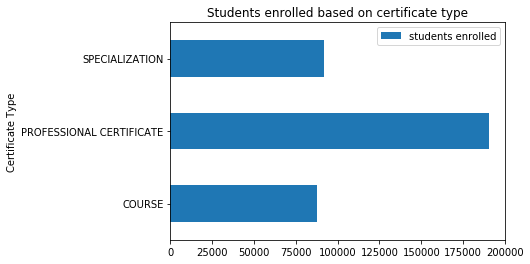

In [42]:
course_type=pd.pivot_table(course,index='course_Certificate_type',values='course_students_enrolled',aggfunc=np.mean).to_dict()
certificate=[]
students=[]
print(course_type)
for key,value in course_type['course_students_enrolled'].items():
    certificate.append(key)
    students.append(value)
certificate_df=pd.DataFrame({'Certificate Type':certificate,'students enrolled':students})
certificate_df.plot.barh(x='Certificate Type',y='students enrolled',title='Students enrolled based on certificate type')

From the above bar graph,we can see that more number of students are enrolled in professional certificate type.Maybe the professional certificate has more weightage in the market than the other course certificates.

# Does the difficulty of the course affect number of students enrolled?

{'course_students_enrolled': {'Advanced': 66547.36842105263, 'Beginner': 81974.94866529774, 'Intermediate': 73264.14141414141, 'Mixed': 133633.1550802139}}


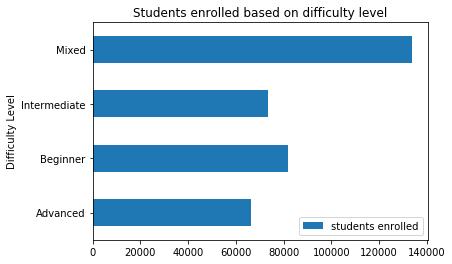

In [45]:
course_diff=pd.pivot_table(course,index='course_difficulty',values='course_students_enrolled',aggfunc=np.mean).to_dict()
diff=[]
students=[]
print(course_diff)
for key,value in course_diff['course_students_enrolled'].items():
    diff.append(key)
    students.append(value)
diff_df=pd.DataFrame({'Difficulty Level':diff,'students enrolled':students})
diff_df.plot.barh(x='Difficulty Level',y='students enrolled',title='Students enrolled based on difficulty level')

Well, there are more number of students enrolled per Mixed difficulty level course rather than Beginner.

# Does number of students enrolled affect the course rating?

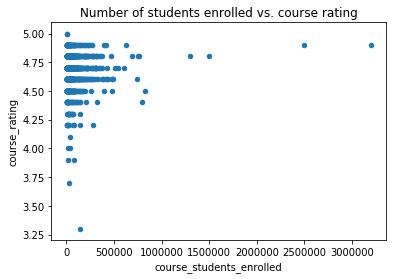

In [46]:
course.plot(kind='scatter', x='course_students_enrolled', y='course_rating', title='Number of students enrolled vs. course rating')

As we can see from the scatterplot there exists an inverse relation between number of students enrolled and course rating.The less the number of students enrolled the more is the rating.There are some exceptions(as always!) but not enough to prove anything.Now lets summarize all the observations that we did so far.

# Summary 

1.Students mostly prefer mixed and beginner difficulty level i.e course difficulty does affect the overall student enrollment.
2.University of Pennsylvania has most number of courses on Coursera followed by University of Michigan.
3.Organizations with more than 10 courses on Coursera are not present in the top 5 organizations list with highest rating.
4.Technical courses(programming,machine learning,data science etc. etc.) have large number of students enrolled but they are not the highest rated courses on Coursera.Perhaps the subjects like machine learning and data science are relatively new so the content must be going through constant upgradation.
5.On the other hand,courses in business,marketing,social science etc. etc. have higher ratings but relatively low number of students enrolled.In this category,there are many courses which are in different language so that explains why there are low number of students enrolled in these courses.
6.Course certificate type does impact the number of students enrolled in that course. More number of students tend to enroll for Professional Certificate courses than just "COURSE" certificate.
7.There is no strong relation to prove that if more number of students are enrolled in a course, the course rating is a higher.